In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [146]:
loan_data=pd.read_csv("C:\\Users\\yfawz\\OneDrive\\Desktop\\capstone_2\\data\\raw\\loan.csv", low_memory=False)

In [149]:
feature_desc=pd.read_excel("C:\\Users\\yfawz\\OneDrive\\Desktop\\capstone_2\\data\\raw\\LCDataDictionary.xlsx")

In [150]:
print("There are " + str(loan_data.shape[0]) + " rows")
print("There are " + str(loan_data.shape[1]) + " columns")

There are 2260668 rows
There are 145 columns


In [151]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [153]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


We will start by defining what some of the vaguely defined and important features mean...

1. loan_amount: Amount of money requested by the borrower
2. funded_amnt: The total amount committed to that loan at that point in time.
3. funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
4. int_rate: The interest rate on the loan

In [154]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [155]:
loan_data.isnull().sum()

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

# Loan Amount

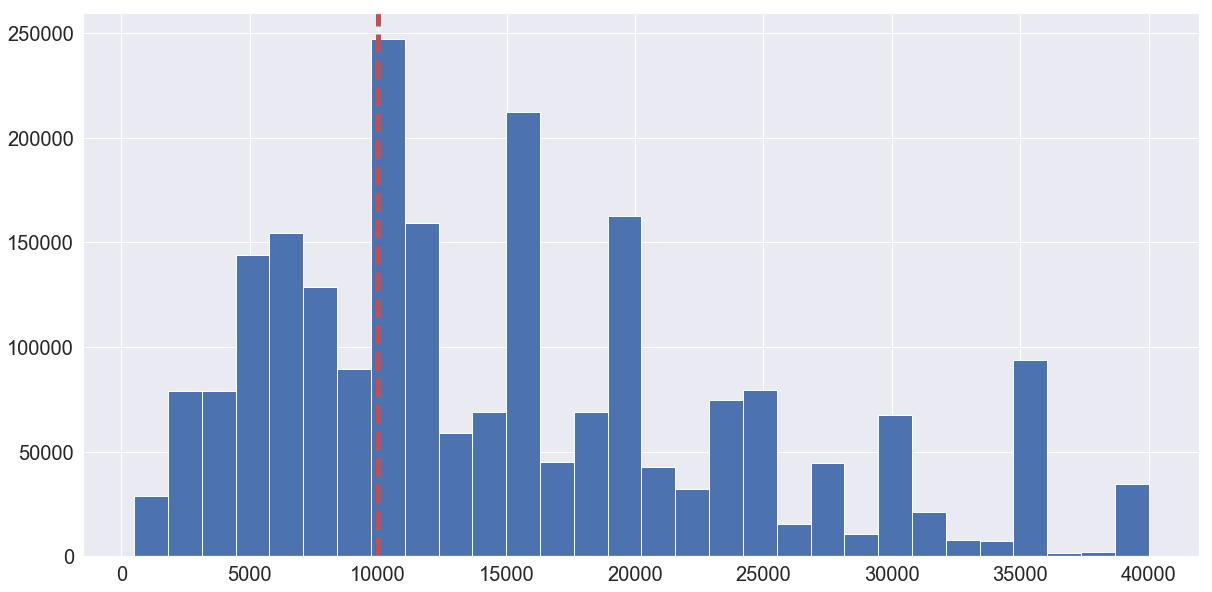

In [156]:
plt.figure(figsize=[20,10])
plt.hist(loan_data.loan_amnt, bins=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.axvline(10000, color='r', linestyle="--", linewidth=5);

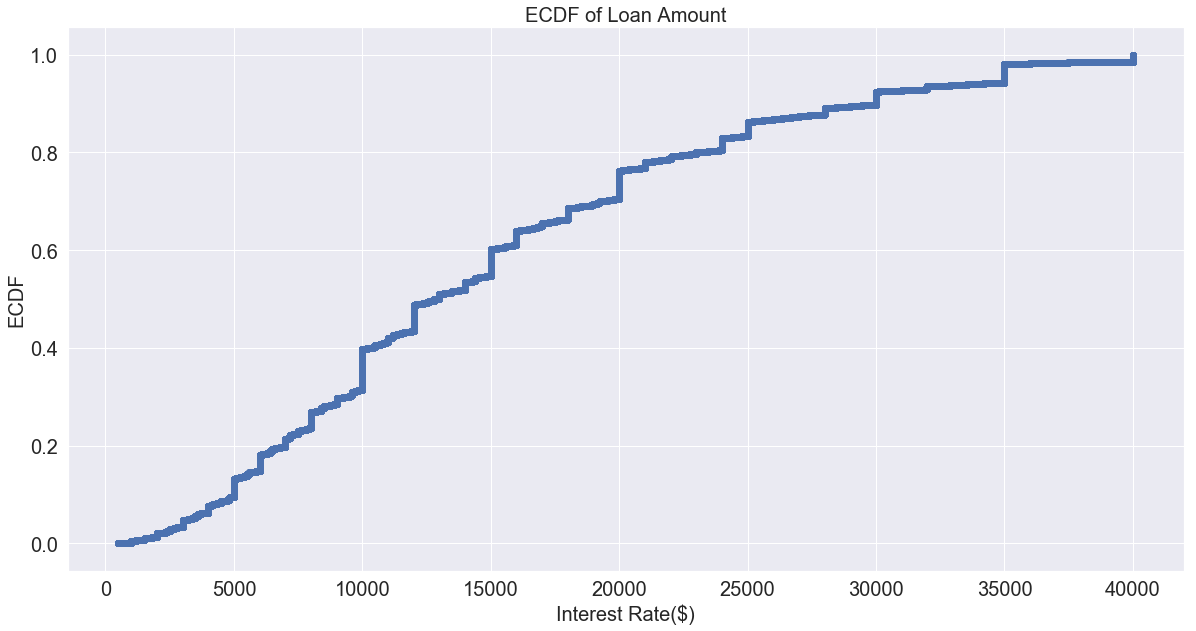

In [157]:
plt.figure(figsize=[20,10])
#plotting ecdf of interest rates
plt.scatter(x=loan_data.loan_amnt.sort_values().values, y=(np.arange(len(loan_data.loan_amnt.sort_values().values)))/len(loan_data.loan_amnt.sort_values().values));

#plotting labels
plt.xlabel("Interest Rate($)",size=20)
plt.xticks(size=20)

plt.ylabel("ECDF",size=20)
plt.yticks(size=20)

plt.title("ECDF of Loan Amount", size=20);

# Funded Amount and Funded Amount INv

# Term (vs Amount)

# Interest Rate (vs Amount and Term)

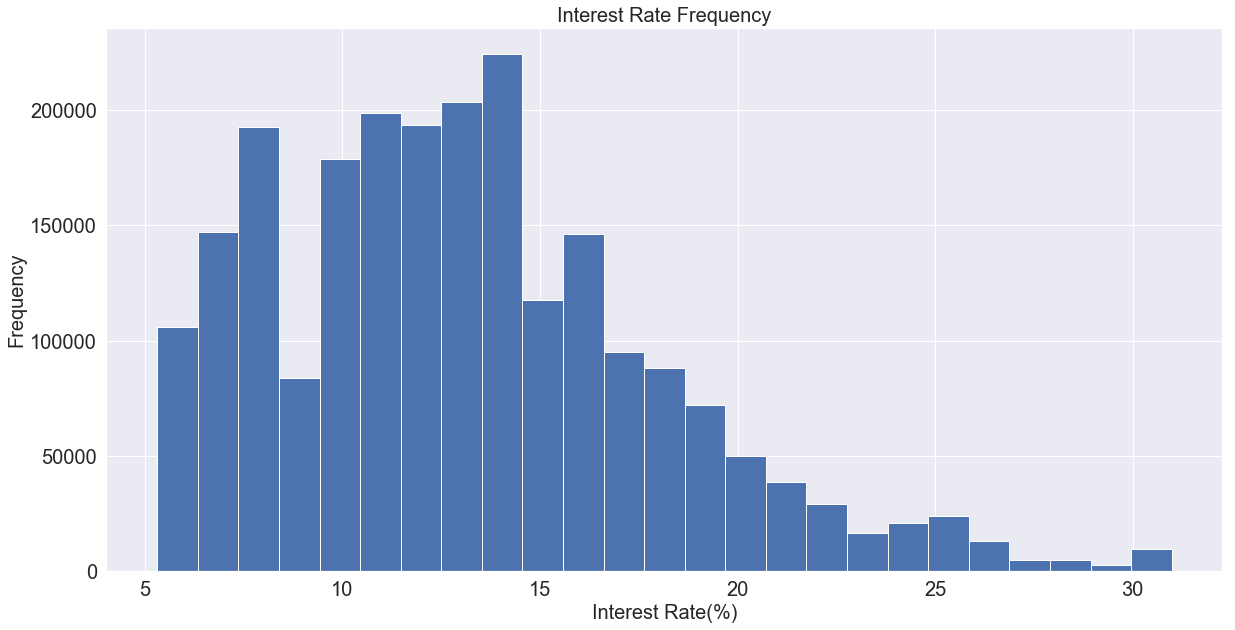

In [158]:
#plotting histogram on Interest rate distrbutions
plt.figure(figsize=[20,10])
plt.hist(loan_data.int_rate, bins=25)
plt.xticks(size=20)
plt.yticks(size=20)

#plot labels
plt.title("Interest Rate Frequency", size=20)
plt.xlabel("Interest Rate(%)",size=20)
plt.ylabel("Frequency",size=20);

In [ ]:
plt.figure(figsize=[20,10])
#plotting ecdf of interest rates
plt.scatter(x=loan_data.int_rate.sort_values().values, y=(np.arange(len(loan_data.int_rate.sort_values().values)))/len(loan_data.int_rate.sort_values().values));

#plotting labels
plt.xlabel("Interest Rate(%)",size=20)
plt.xticks(size=20)

plt.ylabel("ECDF",size=20)
plt.yticks(size=20)

plt.title("ECDF of Interest Rates", size=20);

- Interest rates gradually increases from 5% to 15%
- 50% of Loans are issued at 13% or less.
- 90% of Loans are issued at 20% or less
- Interest rate distribution siginificantly decreases after 15%.
- Another significant decrease at interest rates greater tha 20%.

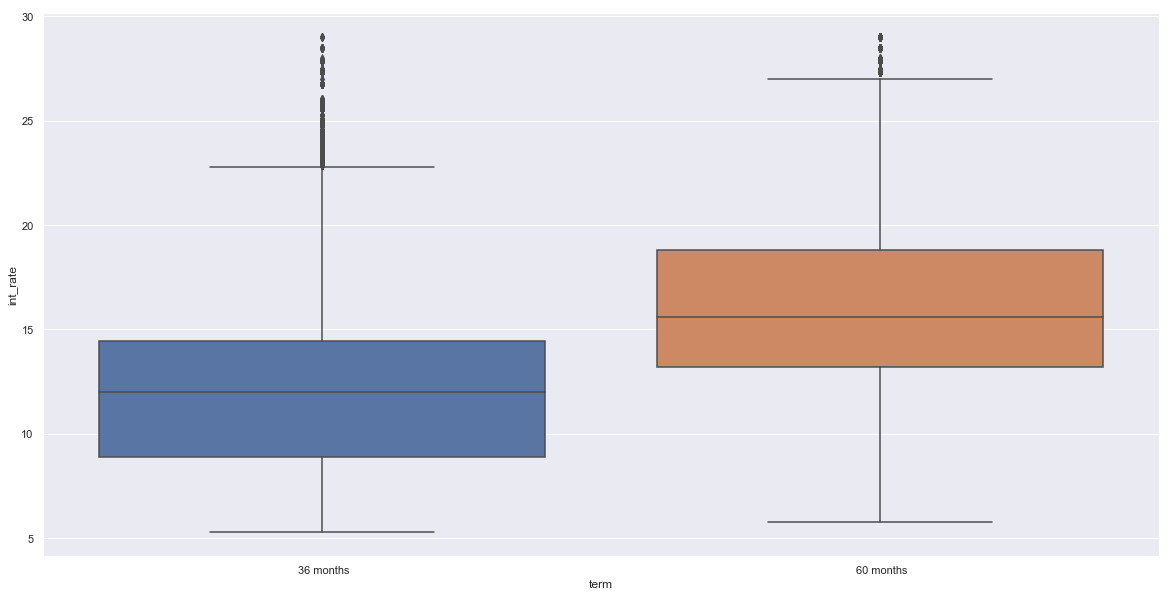

In [82]:
plt.figure(figsize=[20,10])
sns.boxplot(x=loan_data.term,y=loan_data.int_rate);

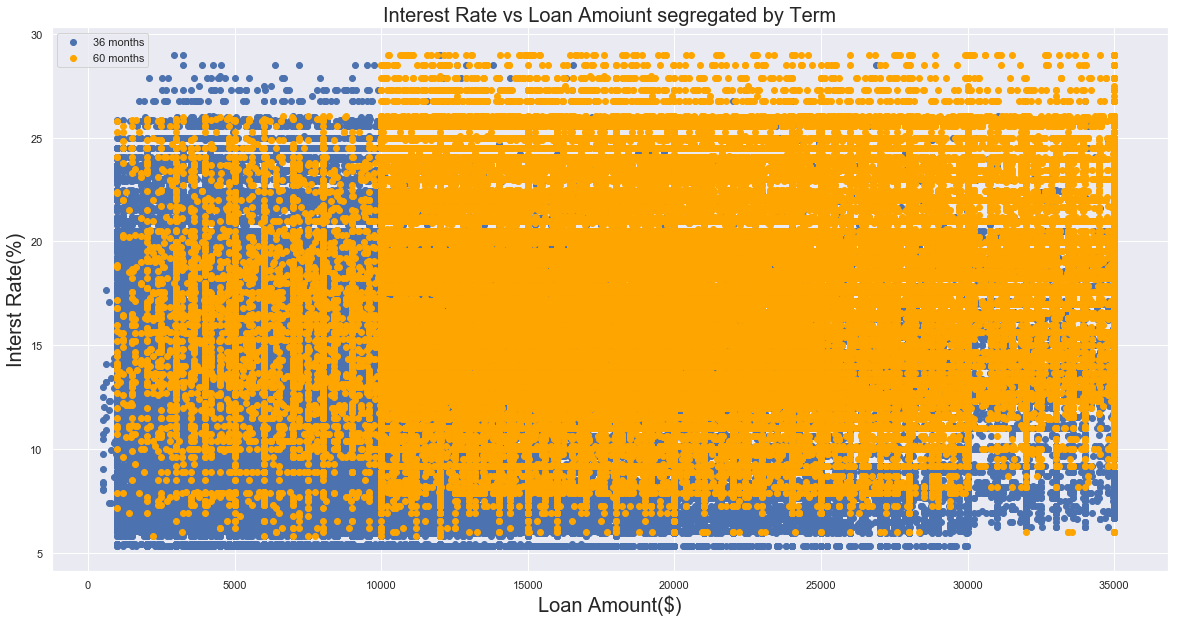

In [110]:
plt.figure(figsize=[20,10])
plt.scatter(x=loan_data[loan_data.term==" 36 months"].loan_amnt, y=loan_data[loan_data.term==" 36 months"].int_rate, label='36 months')
plt.scatter(x=loan_data[loan_data.term==" 60 months"].loan_amnt, y=loan_data[loan_data.term==" 60 months"].int_rate, color='orange', label="60 months")
plt.legend()

plt.xlabel("Loan Amount($)", size=20)
plt.ylabel("Interst Rate(%)",size=20)
plt.title("Interest Rate vs Loan Amoiunt segregated by Term",size=20);

In [118]:
loan_data[loan_data.term==" 36 months"].loan_amnt.std(), loan_data[loan_data.term==" 60 months"].loan_amnt.std()
, loan_data[loan_data.term==" 60 months"].loan_amnt.mean()

(12481.396458039848, 20059.809711778977)

In [120]:
print("The mean loan and interest rate for a 36month term is $" + str(loan_data[loan_data.term==" 36 months"].loan_amnt.mean()) + " & "+ str(loan_data[loan_data.term==" 36 months"].int_rate.mean()))

The mean loan and interest rate for a 36month term is $12481.396458039848 12.018678494715276


In [122]:
print("The mean loan and interest rate for a 60month term is $" + str(loan_data[loan_data.term==" 60 months"].loan_amnt.mean()) + " & "+ str(loan_data[loan_data.term==" 60 months"].int_rate.mean()))

The mean loan and interest rate for a 60month term is $20059.809711778977 & 16.111596182616886


In [123]:
print(loan_data[loan_data.term==" 36 months"].loan_amnt.std(), loan_data[loan_data.term==" 60 months"].loan_amnt.std())

7780.8642251455 7464.594472065129


# 60 vs 36 month Term

1. 36 months:
    - Interest change for loans greater than USD 30,000 tend to have a higher an increased interest rate.

2. 60 months:
    - For loans below USD10,000, interest rates do not seem to exceed 27%.
    - For loans above USD10,000 and up to USD35,000, interest rates range from 7% to 29%. Interest rates tend to be higher, the higher the loan amount.


# Installment (This is based on Term, IR an Amount)

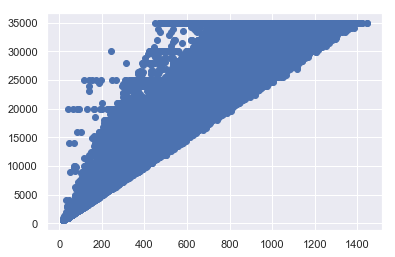

In [127]:
plt.scatter(loan_data.installment, loan_data.loan_amnt);

# Grade and Subgrade (vs Amount, IR, Term)

KeyboardInterrupt: 

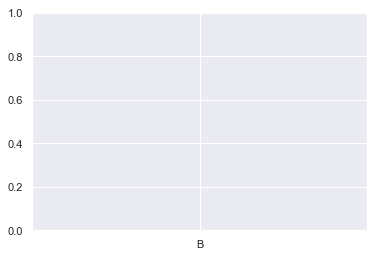

In [144]:
plt.hist(loan_data.grade)

# Employment (Title, Length) vs Amount, Annual Income

# Home Ownership vs Amount, IR, INstallement

# Payment plan

# Description (DESC)

# Loan Status (Amount, grade, home ownership,installment)

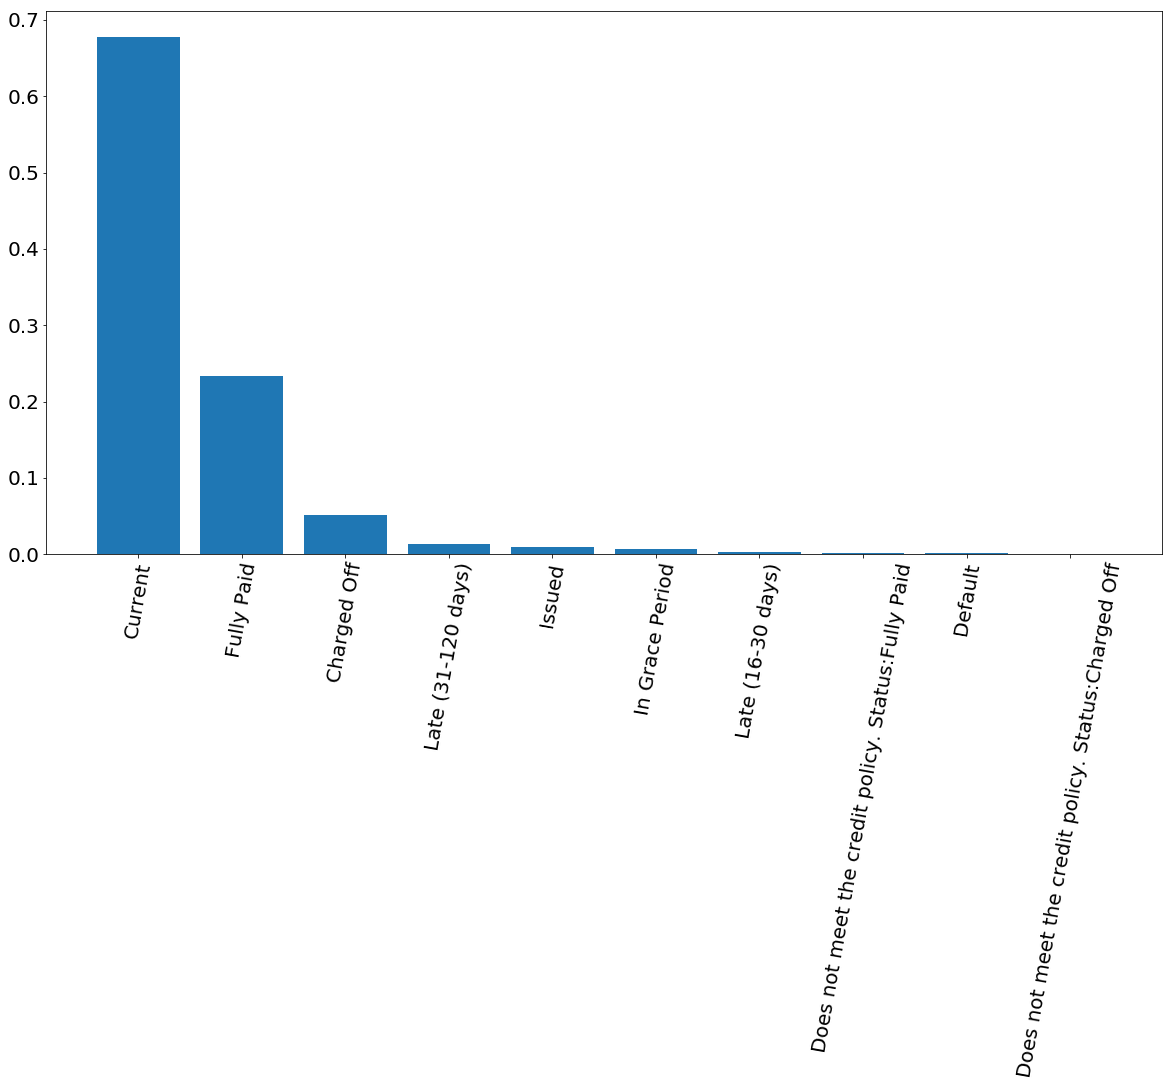

In [20]:
plt.figure(figsize=[20,10])
plt.bar(x=loan_data['loan_status'].value_counts().index, height=loan_data['loan_status'].value_counts(normalize=True))
plt.xticks(rotation=80, size=20)
plt.yticks(size=20);

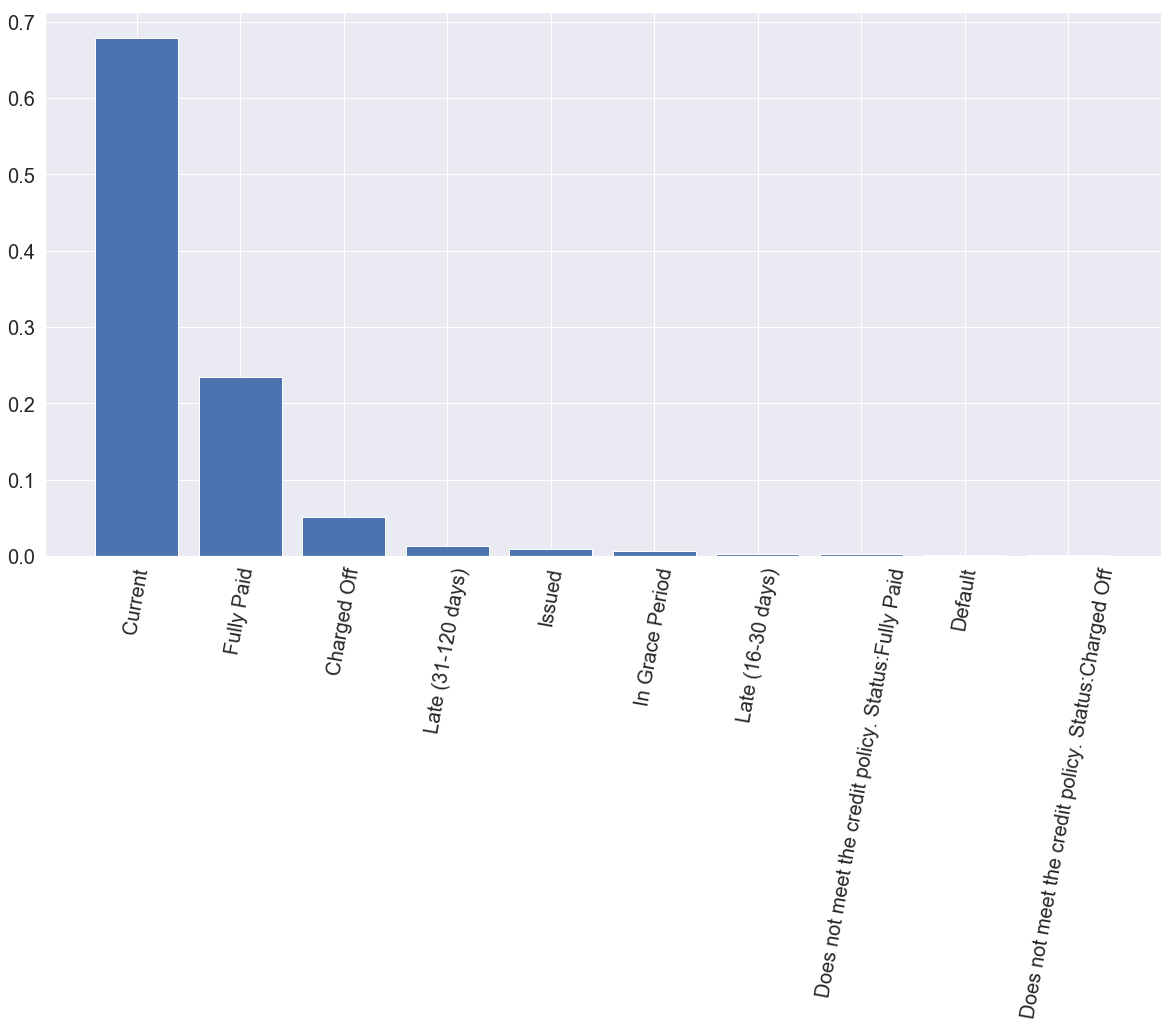

In [108]:
plt.figure(figsize=[20,10])
plt.bar(x=loan_data['loan_status'][2:].value_counts().index, height=loan_data['loan_status'][2:].value_counts(normalize=True))
plt.xticks(rotation=80, size=20)
plt.yticks(size=20);

Scatter Matrix if correlation > 0.5